### Extra Diagrams - Product Categories
#### Angelos Semoglou

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [2]:
processed_data = pd.read_csv('processed_online_retail.csv')
df = processed_data.copy()

In [3]:
display(processed_data.head(3))

,invoice_id,product_id,description,quantity,invoice_date,price_per_unit,customer_id,country,invoice_amount,year,month,day,hour,season,category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,Winter,Vintage Design
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,Winter,Urban Home & Jewellery
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,Winter,Urban Home & Jewellery


In [4]:
revenue_per_category = df.groupby('category')['invoice_amount'].sum()
descriptions_per_category = df.groupby('category')['description'].nunique()
invoices_per_category = df.groupby('category')['invoice_id'].nunique()

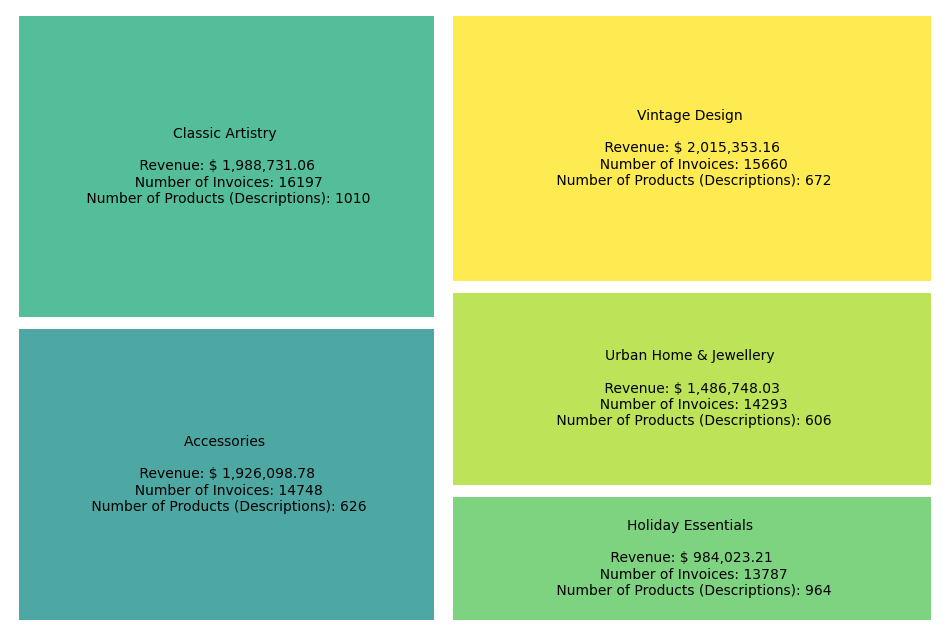

In [5]:
def create_treemap(data, additional_info, title):
    labels = [f'{label} \n{info}' for label, info in zip(data.index, additional_info)]
    sizes = data.values
    normed = sizes / sizes.sum()
    
    fig, ax = plt.subplots(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0.5, 1, len(data)))  
    squarify.plot(sizes=normed, label=labels, alpha=.8, color=colors, pad=True, ax=ax)
    
    plt.title(title)
    plt.axis('off')
    plt.show()

additional_info = [
    f"\n Revenue: $ {revenue:,.2f} \n  Number of Invoices: {invoices} \n Number of Products (Descriptions): {descriptions}"
    for revenue, invoices, descriptions in zip(revenue_per_category, invoices_per_category, descriptions_per_category)
]

create_treemap(revenue_per_category, additional_info, '')

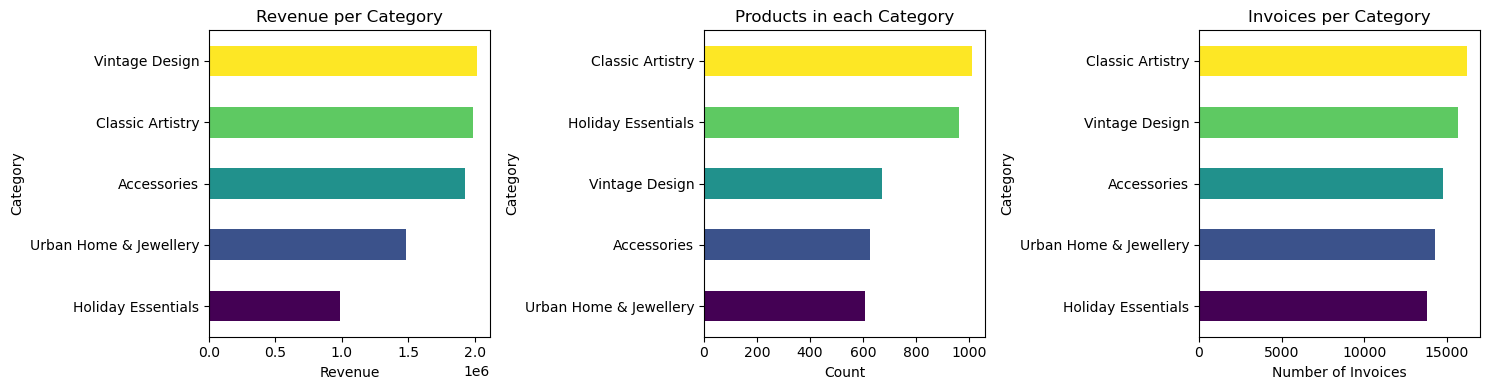

In [7]:
def create_barh_chart(ax, data, title, xlabel, ylabel):
    colors = plt.cm.viridis(np.linspace(0, 1, len(data)))
    data.sort_values().plot(kind='barh', color=colors, ax=ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

create_barh_chart(axes[0],
                  revenue_per_category,
                  'Revenue per Category',
                  'Revenue',
                  'Category')
create_barh_chart(axes[1], descriptions_per_category,
                  'Products in each Category',
                  'Count',
                  'Category')
create_barh_chart(axes[2], invoices_per_category,
                  'Invoices per Category',
                  'Number of Invoices',
                  'Category')

plt.tight_layout()
plt.show()